In [6]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data = pd.read_csv('device41.csv', index_col = 0, header = 0, parse_dates = ['DateTime'])

In [4]:
data.head()

,pm25
DateTime,
2019-12-27 00:00:00,263
2019-12-27 00:00:30,264
2019-12-27 00:01:01,266
2019-12-27 00:01:31,261
2019-12-27 00:02:01,261


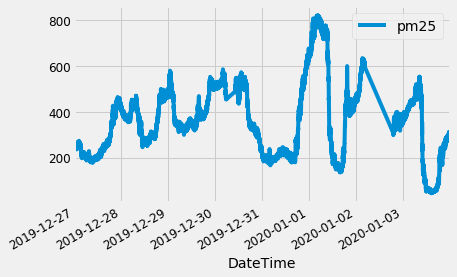

In [7]:
data.plot()

In [8]:
data.isna().sum()

pm25    0
dtype: int64

In [9]:
#Ther are not null values.

In [10]:
data.index

DatetimeIndex(['2019-12-27 00:00:00', '2019-12-27 00:00:30',
               '2019-12-27 00:01:01', '2019-12-27 00:01:31',
               '2019-12-27 00:02:01', '2019-12-27 00:02:31',
               '2019-12-27 00:03:01', '2019-12-27 00:03:32',
               '2019-12-27 00:04:02', '2019-12-27 00:04:32',
               ...
               '2020-01-03 23:55:27', '2020-01-03 23:55:57',
               '2020-01-03 23:56:28', '2020-01-03 23:56:58',
               '2020-01-03 23:57:28', '2020-01-03 23:57:58',
               '2020-01-03 23:58:28', '2020-01-03 23:58:58',
               '2020-01-03 23:59:29', '2020-01-03 23:59:59'],
              dtype='datetime64[ns]', name='DateTime', length=20359, freq=None)

In [28]:
# Downnsampling the Data from 30 second interval to 1 Hour

In [29]:
y = data['pm25'].resample('1H').mean()

In [50]:
y.fillna(method = 'ffill', inplace = True)

In [80]:
print(y['2020-01-03':])

DateTime
2020-01-03 00:00:00    377.161017
2020-01-03 01:00:00    383.008547
2020-01-03 02:00:00    409.210084
2020-01-03 03:00:00    427.717949
2020-01-03 04:00:00    440.008475
2020-01-03 05:00:00    444.059322
2020-01-03 06:00:00    485.949153
2020-01-03 07:00:00    484.745763
2020-01-03 08:00:00    505.743590
2020-01-03 09:00:00    420.666667
2020-01-03 10:00:00    149.247863
2020-01-03 11:00:00     85.170940
2020-01-03 12:00:00     60.631579
2020-01-03 13:00:00     56.923077
2020-01-03 14:00:00     48.897436
2020-01-03 15:00:00     51.008475
2020-01-03 16:00:00     56.811966
2020-01-03 17:00:00     69.728814
2020-01-03 18:00:00    134.601695
2020-01-03 19:00:00    200.444444
2020-01-03 20:00:00    214.638655
2020-01-03 21:00:00    257.126050
2020-01-03 22:00:00    282.008403
2020-01-03 23:00:00    286.554622
Freq: H, Name: pm25, dtype: float64


In [42]:
df_hrs = pd.DataFrame(y)

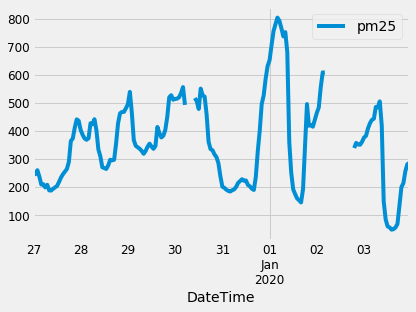

In [43]:
df_hrs.plot()

In [44]:
df_hrs.fillna(method = 'ffill', inplace = True)

In [53]:
df_hrs.head(60)

,pm25
DateTime,
2019-12-27 00:00:00,253.239316
2019-12-27 01:00:00,246.500000
2019-12-27 02:00:00,260.737288
2019-12-27 03:00:00,238.093220
2019-12-27 04:00:00,209.743590
2019-12-27 05:00:00,211.000000
2019-12-27 06:00:00,199.423729
2019-12-27 07:00:00,208.888889
2019-12-27 08:00:00,188.769231


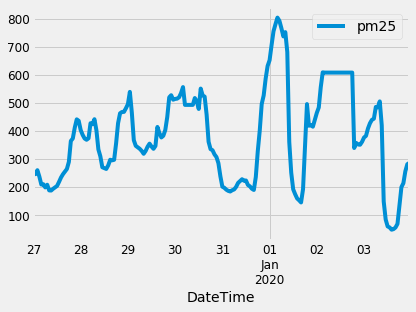

In [46]:
df_hrs.plot()

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

In [51]:
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')

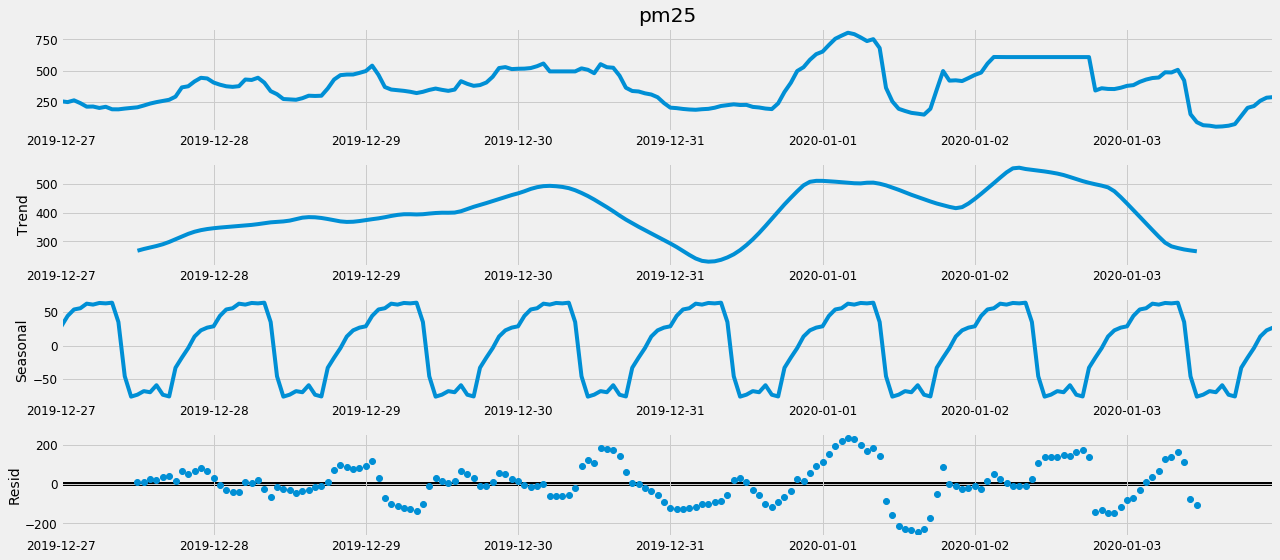

In [52]:
fig = decomposition.plot()
plt.show()

In [56]:
p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [57]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2848.3167384744156
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2581.6466253896324
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2475.805765990243
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2226.040152249091
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2474.974284099845
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2385.9589574525335
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2293.241637602253
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2227.161921523054
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2591.3587618954093
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2344.7852708926707
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2260.70150122187
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2029.7403915381633
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2267.899375697736
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2178.11998100636
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2110.8909812271536
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2031.6840694391237
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2037.2259805628687
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1918.3362544044535
AR

In [90]:
df_hrs[120:169]

,pm25
DateTime,
2020-01-01 00:00:00,652.211864
2020-01-01 01:00:00,705.495798
2020-01-01 02:00:00,755.584746
2020-01-01 03:00:00,780.581197
2020-01-01 04:00:00,803.966102
2020-01-01 05:00:00,792.563025
2020-01-01 06:00:00,766.406780
2020-01-01 07:00:00,737.067797
2020-01-01 08:00:00,752.381356


# The Lowest AIC Value: ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1781.133929163659

In [60]:
mod = sm.tsa.statespace.SARIMAX(y, order = (1,1,1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False, enforce_stationarity=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4066      0.262      1.550      0.121      -0.108       0.921
ma.L1         -0.0047      0.281     -0.017      0.987      -0.556       0.547
ma.S.L12      -0.9494      0.146     -6.521      0.000      -1.235      -0.664
sigma2      2451.7182    246.614      9.942      0.000    1968.364    2935.072


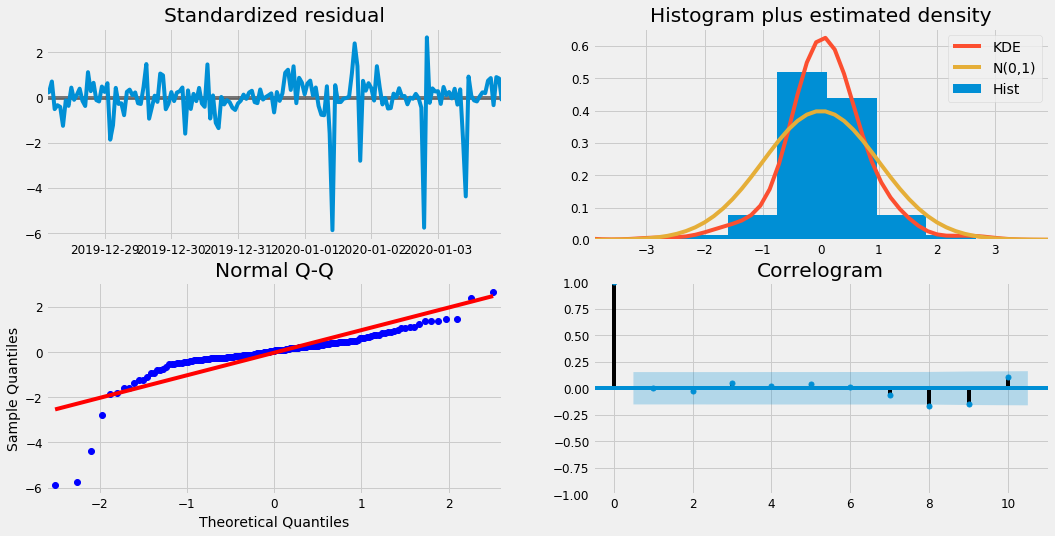

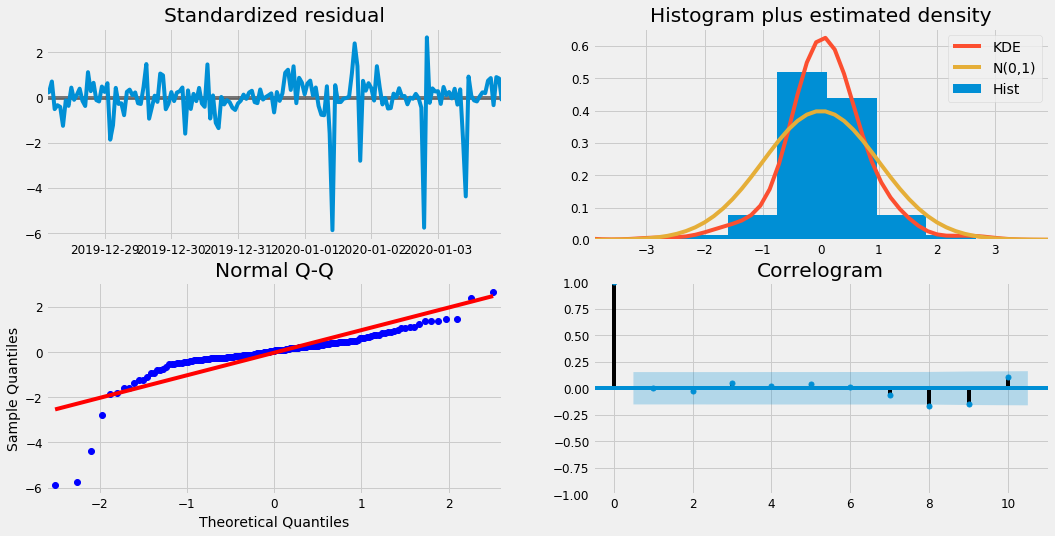

In [61]:
results.plot_diagnostics(figsize=(16, 8))

In [62]:
# Comparing the predicted sales to the real sales of the time series

In [84]:
df_hrs.head()

,pm25
DateTime,
2019-12-27 00:00:00,253.239316
2019-12-27 01:00:00,246.500000
2019-12-27 02:00:00,260.737288
2019-12-27 03:00:00,238.093220
2019-12-27 04:00:00,209.743590


In [76]:
df_hrs.index

DatetimeIndex(['2019-12-27 00:00:00', '2019-12-27 01:00:00',
               '2019-12-27 02:00:00', '2019-12-27 03:00:00',
               '2019-12-27 04:00:00', '2019-12-27 05:00:00',
               '2019-12-27 06:00:00', '2019-12-27 07:00:00',
               '2019-12-27 08:00:00', '2019-12-27 09:00:00',
               ...
               '2020-01-03 14:00:00', '2020-01-03 15:00:00',
               '2020-01-03 16:00:00', '2020-01-03 17:00:00',
               '2020-01-03 18:00:00', '2020-01-03 19:00:00',
               '2020-01-03 20:00:00', '2020-01-03 21:00:00',
               '2020-01-03 22:00:00', '2020-01-03 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=192, freq='H')

In [83]:
pred = results.get_prediction(start = pd.to_datetime('2020-01-03 00:00:00'), dynamic = False)
pred_ci = pred.conf_int()

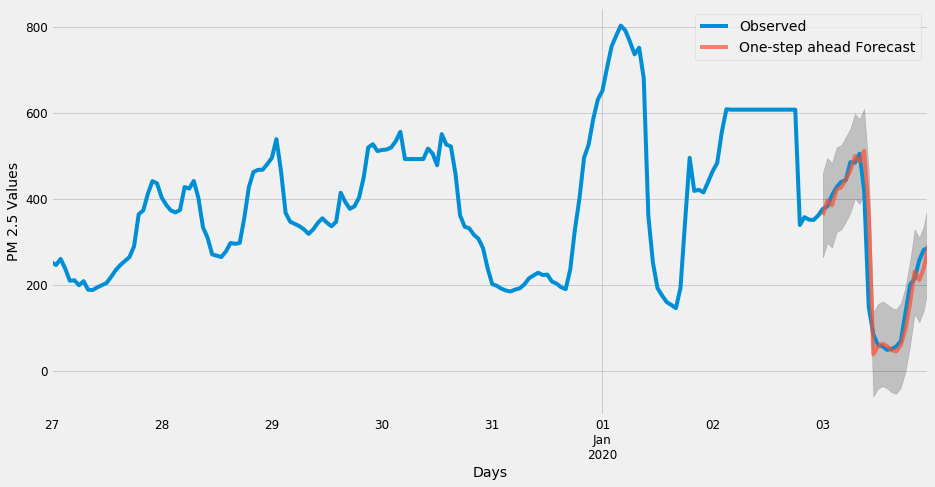

In [98]:
ax = y['2019-12-27 00:00:00':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Days')
ax.set_ylabel('PM 2.5 Values')
plt.legend()
plt.show()

In [91]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-03 00:00:00':]

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mse = np.sqrt(mean_squared_error(y_forecasted, y_truth))

In [96]:
mse

53.59436316905516

In [112]:
pred_uc = results.get_forecast(steps = 7)
pred_ci = pred_uc.conf_int()

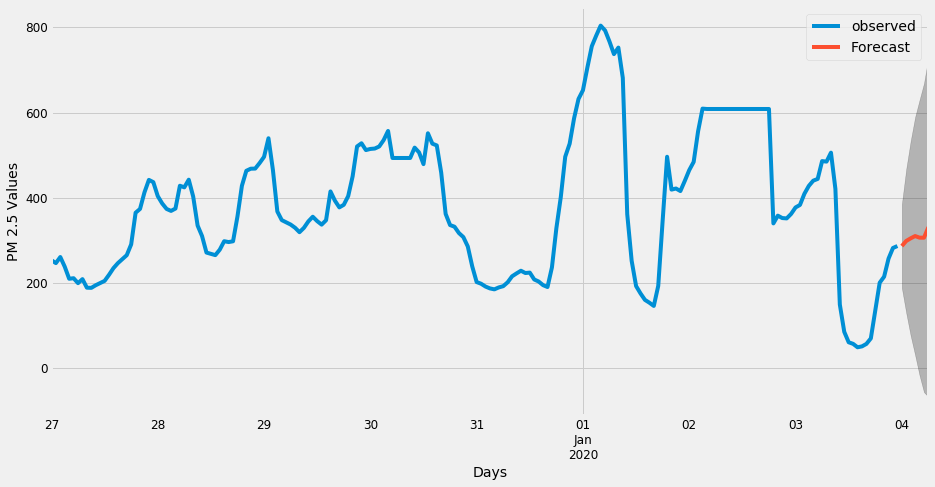

In [113]:
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Days')
ax.set_ylabel('PM 2.5 Values')
plt.legend()
plt.show()

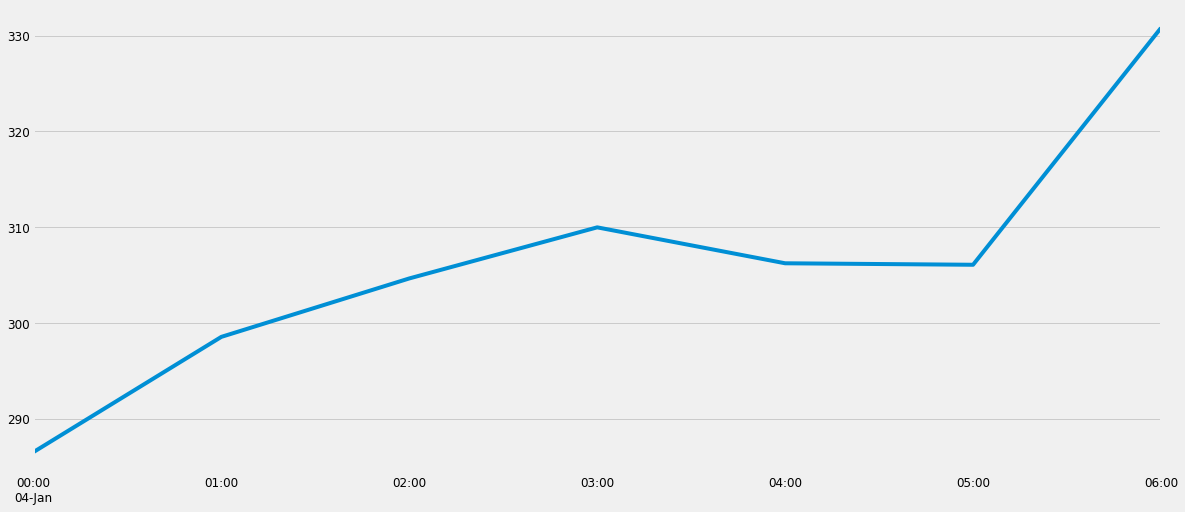

In [115]:
pred_uc.predicted_mean.plot()

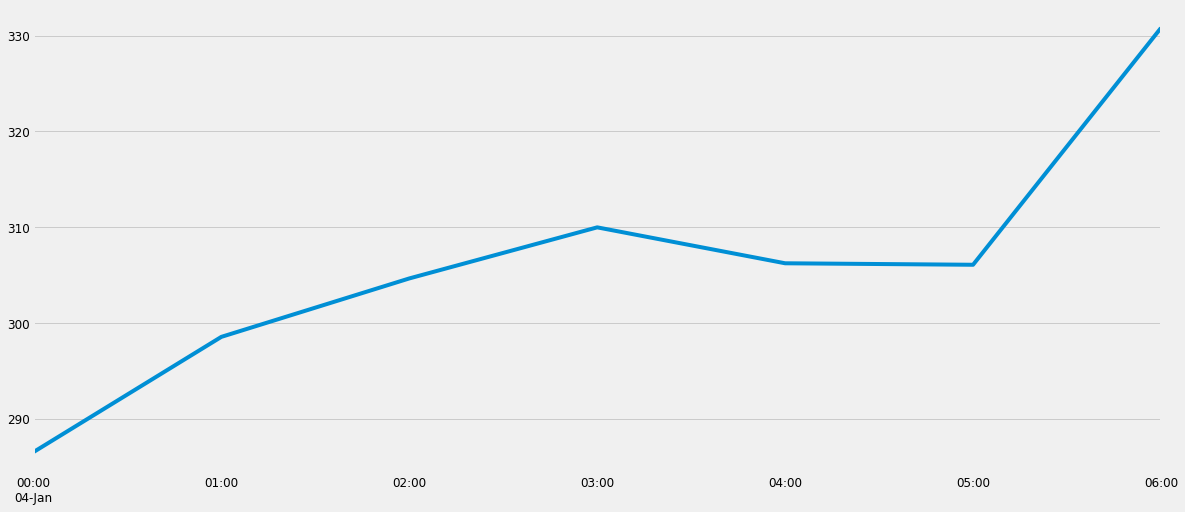

In [117]:
pred_uc.predicted_mean.plot()